In [2]:
# Infinity AI Tools
import infinity_tools.visionfit.api as api
import infinity_tools.visionfit.vis as vis
from infinity_tools.visionfit.vis import summarize_batch_results_as_dataframe, visualize_batch_results
from infinity_tools.common.api import Batch, filter_for_valid_ids
from infinity_tools.common.vis.notebook import display_video_as_gif, display_parameters, visualize_job_params
from infinity_tools.common.vis.images import view_previews

In [3]:
# General Imports
from decouple import config
import numpy as np
import os

In [4]:
# Get API Access Key for Infinity AI Tools
TOKEN = config('INFINITY_KEY')
OUTPUT_FOLDER = "./rep_count_tmp/"

In [5]:
# Helper function, adapted from Infinity AI Notebook
def visualize_result(batch: Batch, output_dir: str, return_jobs: bool = False):
    completed_jobs = batch.await_jobs()
    job_folders = api.download_completed_videos(completed_jobs, output_dir=output_dir)
    display_video_as_gif(vis.visualize_all_labels(job_folders[0]), display_width=800)
    if return_jobs:
        return completed_jobs

In [6]:
display_parameters(api, TOKEN)

,name,type,options,default_value
avatar_identity,avatar_identity,int,"{'max': 24, 'min': 0}",0
camera_distance,camera_distance,float,"{'max': 5.25, 'min': 1.0}",3.0
camera_height,camera_height,float,"{'max': 2.75, 'min': 0.1}",0.75
exercise,exercise,str,"{'choices': ['V_UP', 'SITUP', 'BRIDGE', 'BURPEE', 'PUSHUP', 'BIRD_DOG', 'CRUNCHES', 'SUPERMAN', 'LEG_RAISE', 'DOWNWARD_DOG', 'UPPERCUT-LEFT', 'CLAMSHELL-LEFT', 'UPPERCUT-RIGHT', 'CLAMSHELL-RIGHT', 'LUNGE-CROSSBACK', 'BEAR_CRAWL-HOLDS', 'DONKEY_KICK-LEFT', 'PUSHUP-EXPLOSIVE', 'SQUAT-BODYWEIGHT', 'DEADLIFT-DUMBBELL', 'DONKEY_KICK-RIGHT', 'PUSHUP-CLOSE_GRIP', 'ARM_RAISE-DUMBBELL', 'BICEP_CURL-BARBELL', 'SQUAT-BACK-BARBELL', 'SQUAT-GOBLET+SUMO-DUMBBELL', 'PRESS-SINGLE_ARM-DUMBBELL-LEFT', 'BICEP_CURL-ALTERNATING-DUMBBELL', 'PRESS-SINGLE_ARM-DUMBBELL-RIGHT', 'PUSH_PRESS-SINGLE_ARM-DUMBBELL-LEFT', 'PUSH_PRESS-SINGLE_ARM-DUMBBELL-RIGHT', 'SPLIT_SQUAT-SINGLE_ARM-DUMBBELL-LEFT', 'SPLIT_SQUAT-SINGLE_ARM-DUMBBELL-RIGHT', 'TRICEP_KICKBACK-BENT_OVER+SINGLE_ARM-DUMBBELL-LEFT', 'TRICEP_KICKBACK-BENT_OVER+SINGLE_ARM-DUMBBELL-RIGHT']}",PUSHUP
frame_rate,frame_rate,int,"{'choices': [30, 24, 12, 8, 6]}",24
gender,gender,str,"{'choices': ['MALE', 'FEMALE']}",MALE
image_height,image_height,int,"{'max': 512, 'min': 128}",256
image_width,image_width,int,"{'max': 512, 'min': 128}",256
kinematic_noise_factor,kinematic_noise_factor,float,"{'max': 2.0, 'min': 0.0}",1.0
lighting_power,lighting_power,float,"{'max': 2000.0, 'min': 0.0}",100.0


# Generate Batch for SQUAT Exercise

In [8]:
genders = ['MALE','FEMALE']

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Duration for all jobs: 226 [s]	


  0%|          | 0/30 [00:00<?, ?it/s]

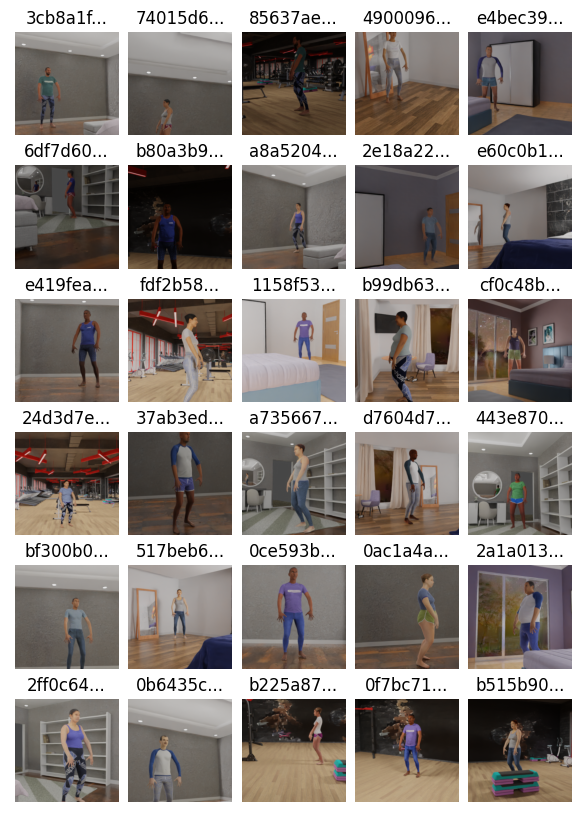

In [10]:
num_previews = 30

# Set some initial parameters.
job_params = [
        api.sample_input(
            token=TOKEN,
            exercise = "SQUAT-BODYWEIGHT",
            num_reps = 2,
            gender = genders[i % 2],
            trim_start_frac= 0.0,
            trim_end_frac= 0.0,
            lighting_power = float(np.random.uniform(50.0, 500.0, 1)[0]),
            camera_height = float(np.random.uniform(0.5, 1.5, 1)[0]),
            relative_camera_yaw_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_camera_pitch_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_avatar_angle_deg= float(np.random.uniform(-90.0, 90.0, 1)[0]),
            frame_rate=12,
            image_height=256,
            image_width=256,
        ) for i in range(num_previews)
    ]

previews_batch, previews_batch_folder = api.submit_preview_batch_to_api(
    token=TOKEN,
    preview_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

# Await the batch job to complete.
completed_previews = previews_batch.await_jobs(timeout=5 * 60, polling_interval=5)
previews_folders = api.download_completed_previews(completed_previews=completed_previews, output_dir=previews_batch_folder)

#Visualize the previews in a grid, and take a look at our existing job parameter distributions.
view_previews(previews_folders)
visualize_job_params(job_params)

In [11]:
batch_folder_suffix = "squat_rep_count_test_data"

_, batch_folder = api.submit_video_batch_to_api(
    token=TOKEN,
    job_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

print(f"Batch folder (use this folder path to poll status after restarting): {batch_folder}")

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Batch folder (use this folder path to poll status after restarting): ./rep_count_tmp/20230109_T010544835405_squat_rep_count_test_data


Poll status

In [74]:
batch_folder = './rep_count_tmp/20230109_T010544835405_squat_rep_count_test_data'

# Reconstitute our batch process state (replace `batch_folder` with desired batch folder)
batch = api.Batch.from_batch_folder(batch_folder_path=batch_folder, token=TOKEN)

# Poll the server to see the status of our batch job.
successful_jobs, failed_jobs = batch.get_completed_jobs_valid_and_invalid()

num_successful = len(successful_jobs)
num_failed = len(failed_jobs)
num_submitted = len(batch.job_ids)

print(f"{num_successful+num_failed}/{num_submitted} submitted jobs have completed.")
print(f"{num_successful}/{num_successful+num_failed} completed jobs have a valid URL.")

30/30 submitted jobs have completed.
30/30 completed jobs have a valid URL.


Download jobs

In [24]:
job_folders = api.download_completed_videos(completed_jobs=successful_jobs, output_dir=batch_folder)

  0%|          | 0/30 [00:00<?, ?it/s]

In [75]:
import pandas as pd
pd.options.display.max_columns = None

df = summarize_batch_results_as_dataframe(batch_folder)
df.to_csv(os.path.join(batch_folder,'summary.csv'), index=False)

# Generate Batch for ARM_RAISE Exercise

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Duration for all jobs: 268 [s]	


  0%|          | 0/30 [00:00<?, ?it/s]

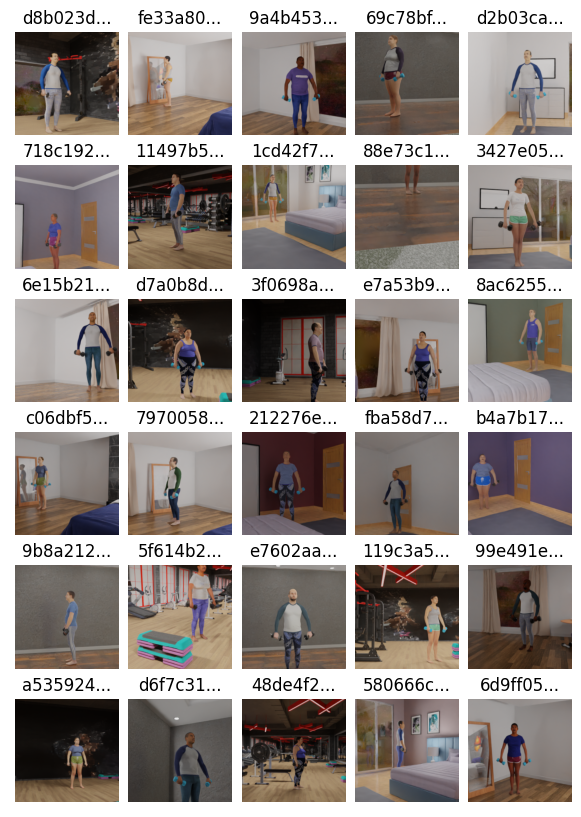

In [13]:
genders = ['MALE','FEMALE']

batch_folder_suffix = 'arm_raise_previews'
num_previews = 30

# Set some initial parameters.
job_params = [
        api.sample_input(
            token=TOKEN,
            exercise = 'ARM_RAISE-DUMBBELL',
            num_reps = 2,
            gender = genders[i % 2],
            trim_start_frac= 0.0,
            trim_end_frac= 0.0,
            lighting_power = float(np.random.uniform(50.0, 500.0, 1)[0]),
            camera_height = float(np.random.uniform(0.5, 1.5, 1)[0]),
            relative_camera_yaw_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_camera_pitch_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_avatar_angle_deg= float(np.random.uniform(-90.0, 90.0, 1)[0]),
            frame_rate=12,
            image_height=256,
            image_width=256,
        ) for i in range(num_previews)
    ]

previews_batch, previews_batch_folder = api.submit_preview_batch_to_api(
    token=TOKEN,
    preview_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

# Await the batch job to complete.
completed_previews = previews_batch.await_jobs(timeout=5 * 60, polling_interval=5)
previews_folders = api.download_completed_previews(completed_previews=completed_previews, output_dir=previews_batch_folder)

#Visualize the previews in a grid, and take a look at our existing job parameter distributions.
view_previews(previews_folders)
visualize_job_params(job_params)

In [14]:
batch_folder_suffix = "arm_raise_rep_count_test_data"

_, batch_folder = api.submit_video_batch_to_api(
    token=TOKEN,
    job_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

print(f"Batch folder (use this folder path to poll status after restarting): {batch_folder}")

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Batch folder (use this folder path to poll status after restarting): ./rep_count_tmp/20230109_T011742449572_arm_raise_rep_count_test_data


In [65]:
batch_folder = './rep_count_tmp/20230109_T011742449572_arm_raise_rep_count_test_data'

# Reconstitute our batch process state (replace `batch_folder` with desired batch folder)
batch = api.Batch.from_batch_folder(batch_folder_path=batch_folder, token=TOKEN)

# Poll the server to see the status of our batch job.
successful_jobs, failed_jobs = batch.get_completed_jobs_valid_and_invalid()

num_successful = len(successful_jobs)
num_failed = len(failed_jobs)
num_submitted = len(batch.job_ids)

print(f"{num_successful+num_failed}/{num_submitted} submitted jobs have completed.")
print(f"{num_successful}/{num_successful+num_failed} completed jobs have a valid URL.")

30/30 submitted jobs have completed.
30/30 completed jobs have a valid URL.


In [62]:
job_folders = api.download_completed_videos(completed_jobs=successful_jobs, output_dir=batch_folder)

  0%|          | 0/30 [00:00<?, ?it/s]

In [76]:
import pandas as pd
pd.options.display.max_columns = None

df = summarize_batch_results_as_dataframe(batch_folder)
df.to_csv(os.path.join(batch_folder,'summary.csv'), index=False)

# Generate Batch for BICEP_CURL Exercise

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Duration for all jobs: 63 [s]	


  0%|          | 0/30 [00:00<?, ?it/s]

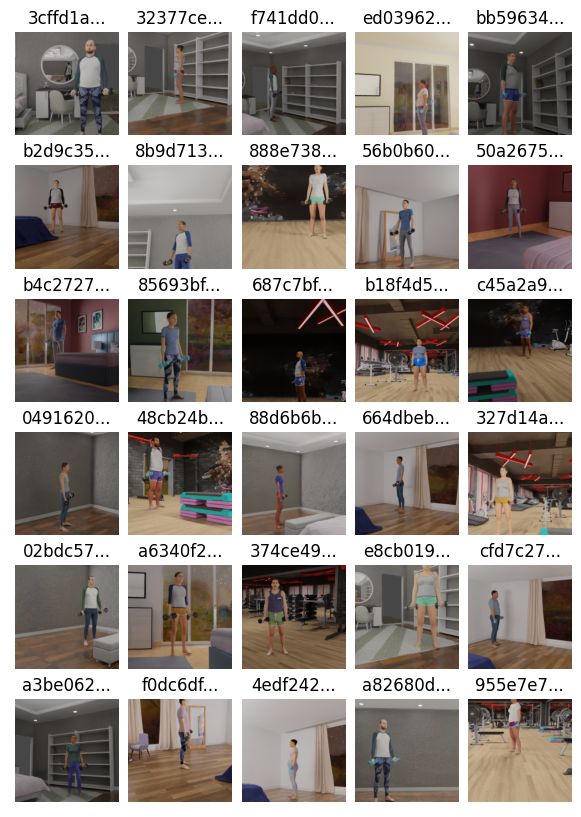

In [15]:
genders = ['MALE','FEMALE']

batch_folder_suffix = 'bicep_curl_previews'
num_previews = 30

# Set some initial parameters.
job_params = [
        api.sample_input(
            token=TOKEN,
            exercise = 'BICEP_CURL-ALTERNATING-DUMBBELL',
            num_reps = 2,
            gender = genders[i % 2],
            trim_start_frac= 0.0,
            trim_end_frac= 0.0,
            lighting_power = float(np.random.uniform(50.0, 500.0, 1)[0]),
            camera_height = float(np.random.uniform(0.5, 1.5, 1)[0]),
            relative_camera_yaw_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_camera_pitch_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_avatar_angle_deg= float(np.random.uniform(-90.0, 90.0, 1)[0]),
            frame_rate=12,
            image_height=256,
            image_width=256,
        ) for i in range(num_previews)
    ]

previews_batch, previews_batch_folder = api.submit_preview_batch_to_api(
    token=TOKEN,
    preview_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

# Await the batch job to complete.
completed_previews = previews_batch.await_jobs(timeout=5 * 60, polling_interval=5)
previews_folders = api.download_completed_previews(completed_previews=completed_previews, output_dir=previews_batch_folder)

#Visualize the previews in a grid, and take a look at our existing job parameter distributions.
view_previews(previews_folders)
visualize_job_params(job_params)

In [16]:
batch_folder_suffix = "bicep_curl_rep_count_test_data"

_, batch_folder = api.submit_video_batch_to_api(
    token=TOKEN,
    job_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

print(f"Batch folder (use this folder path to poll status after restarting): {batch_folder}")

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Batch folder (use this folder path to poll status after restarting): ./rep_count_tmp/20230109_T012151981034_bicep_curl_rep_count_test_data


In [96]:
batch_folder = './rep_count_tmp/20230109_T012151981034_bicep_curl_rep_count_test_data'

# Reconstitute our batch process state (replace `batch_folder` with desired batch folder)
batch = api.Batch.from_batch_folder(batch_folder_path=batch_folder, token=TOKEN)

# Poll the server to see the status of our batch job.
successful_jobs, failed_jobs = batch.get_completed_jobs_valid_and_invalid()

num_successful = len(successful_jobs)
num_failed = len(failed_jobs)
num_submitted = len(batch.job_ids)

print(f"{num_successful+num_failed}/{num_submitted} submitted jobs have completed.")
print(f"{num_successful}/{num_successful+num_failed} completed jobs have a valid URL.")

30/30 submitted jobs have completed.
30/30 completed jobs have a valid URL.


In [97]:
job_folders = api.download_completed_videos(completed_jobs=successful_jobs, output_dir=batch_folder)

  0%|          | 0/30 [00:00<?, ?it/s]

In [98]:
import pandas as pd
pd.options.display.max_columns = None

df = summarize_batch_results_as_dataframe(batch_folder)
df.to_csv(os.path.join(batch_folder,'summary.csv'), index=False)

# Generate Batch for LEG_RAISE Exercise

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Duration for all jobs: 58 [s]	


  0%|          | 0/30 [00:00<?, ?it/s]

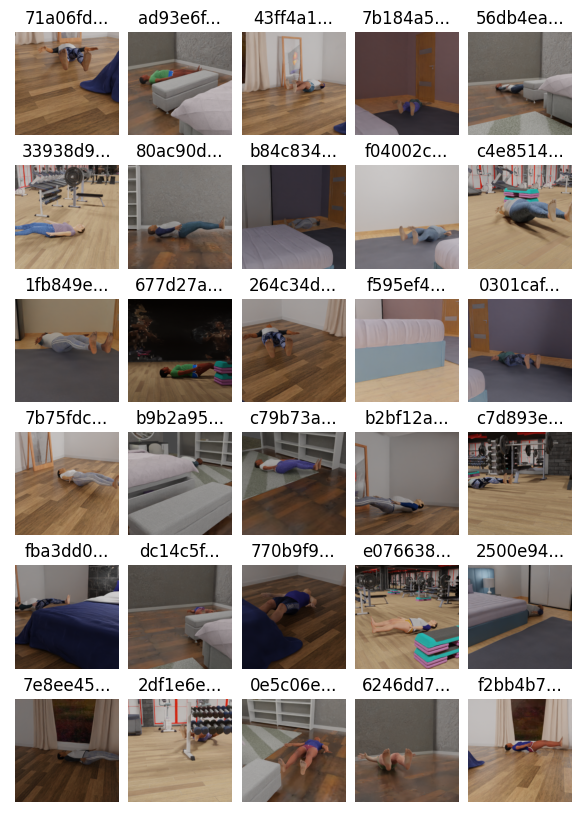

In [20]:
genders = ['MALE','FEMALE']

batch_folder_suffix = 'leg_raise_previews'
num_previews = 30

# Set some initial parameters.
job_params = [
        api.sample_input(
            token=TOKEN,
            exercise = 'LEG_RAISE',
            num_reps = 2,
            gender = genders[i % 2],
            trim_start_frac= 0.0,
            trim_end_frac= 0.0,
            lighting_power = float(np.random.uniform(50.0, 500.0, 1)[0]),
            camera_height = float(np.random.uniform(0.5, 1.5, 1)[0]),
            relative_camera_yaw_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_camera_pitch_deg= float(np.random.normal(0.0, 6.0, 1)[0]),
            relative_avatar_angle_deg= float(np.random.uniform(-90.0, 90.0, 1)[0]),
            frame_rate=12,
            image_height=256,
            image_width=256,
        ) for i in range(num_previews)
    ]

previews_batch, previews_batch_folder = api.submit_preview_batch_to_api(
    token=TOKEN,
    preview_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

# Await the batch job to complete.
completed_previews = previews_batch.await_jobs(timeout=5 * 60, polling_interval=5)
previews_folders = api.download_completed_previews(completed_previews=completed_previews, output_dir=previews_batch_folder)

#Visualize the previews in a grid, and take a look at our existing job parameter distributions.
view_previews(previews_folders)
visualize_job_params(job_params)

In [21]:
batch_folder_suffix = "leg_raise_rep_count_test_data"

_, batch_folder = api.submit_video_batch_to_api(
    token=TOKEN,
    job_params=job_params,
    output_dir=OUTPUT_FOLDER,
    batch_folder_suffix=batch_folder_suffix,
)

print(f"Batch folder (use this folder path to poll status after restarting): {batch_folder}")

Submitting jobs to API...


  0%|          | 0/29 [00:00<?, ?it/s]

Batch folder (use this folder path to poll status after restarting): ./rep_count_tmp/20230109_T013138980161_leg_raise_rep_count_test_data


In [93]:
batch_folder = './rep_count_tmp/20230109_T013138980161_leg_raise_rep_count_test_data'

# Reconstitute our batch process state (replace `batch_folder` with desired batch folder)
batch = api.Batch.from_batch_folder(batch_folder_path=batch_folder, token=TOKEN)

# Poll the server to see the status of our batch job.
successful_jobs, failed_jobs = batch.get_completed_jobs_valid_and_invalid()

num_successful = len(successful_jobs)
num_failed = len(failed_jobs)
num_submitted = len(batch.job_ids)

print(f"{num_successful+num_failed}/{num_submitted} submitted jobs have completed.")
print(f"{num_successful}/{num_successful+num_failed} completed jobs have a valid URL.")

30/30 submitted jobs have completed.
30/30 completed jobs have a valid URL.


In [94]:
job_folders = api.download_completed_videos(completed_jobs=successful_jobs, output_dir=batch_folder)

  0%|          | 0/30 [00:00<?, ?it/s]

In [95]:
import pandas as pd
pd.options.display.max_columns = None

df = summarize_batch_results_as_dataframe(batch_folder)
df.to_csv(os.path.join(batch_folder,'summary.csv'), index=False)